In [21]:
%matplotlib inline


# Vis Autoselect

In this Demo we will autoselect visualisation depending of the input arrays from ML experiments.

Load Data and train model
-------------------------

We will set the sample inputs here 

In [22]:
# Sample Model 

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)

# y_test right labeled data 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

# y_pred: prediciton for data labeled
y_pred = clf.predict(X_test)

# y_score: confidence scores
y_score = clf.decision_function(X_test)

Accuracy: 
0.7754010695187166
Hamming Loss:
0.22459893048128343


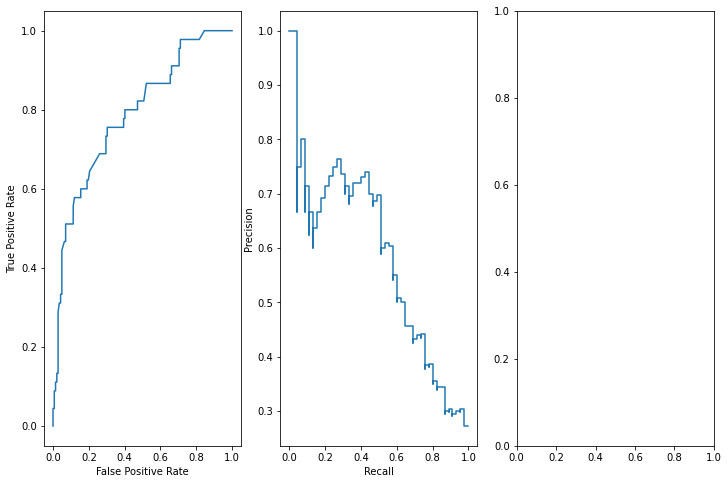

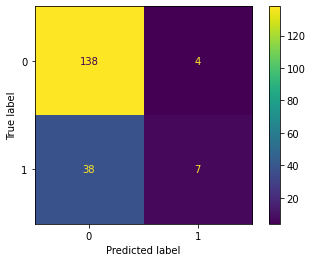

In [23]:
visualize(y_test, y_pred, y_score)

Accuracy: 
0.7754010695187166
Hamming Loss:
0.22459893048128343


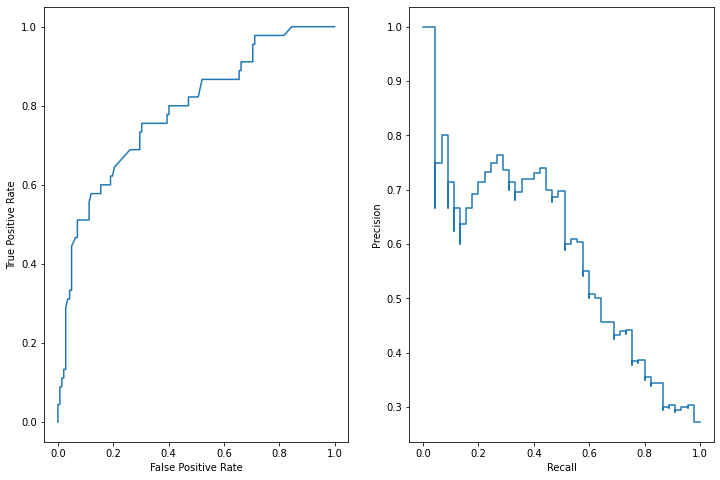

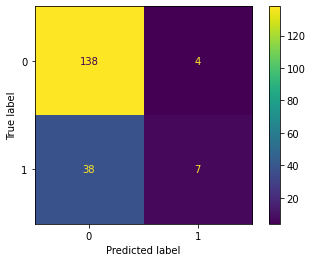

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss

def visualize(y_test, y_pred, y_score):
    
    #print(y_test)
    #print(y_pred)
    #print(y_score)
    
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(cm)
    
    # Roc Curve
    fpr, tpr, _ = roc_curve(y_test, y_score, '2')
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    
    # Precision Recall Curve
    prec, recall, _ = precision_recall_curve(y_test, y_score, '2')
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
    
    #End Vis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    
    print("Accuracy: ")
    print(accuracy_score(y_test, y_pred))
    
    print("Hamming Loss:")
    print(hamming_loss(y_test, y_pred))

    roc_display.plot(ax=ax1)
    pr_display.plot(ax=ax2)
    # cm_display.plot(ax=ax3)
    plt.show()
    cm_display = ConfusionMatrixDisplay(cm).plot()

visualize(y_test, y_pred, y_score)
    


Create :class:`ConfusionMatrixDisplay`
#############################################################################
 With the fitted model, we compute the predictions of the model on the test
 dataset. These predictions are used to compute the confustion matrix which
 is plotted with the :class:`ConfusionMatrixDisplay`



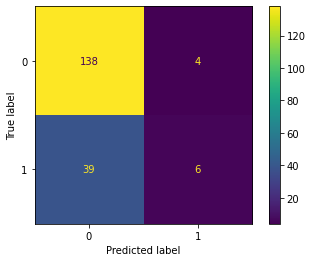

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Create :class:`RocCurveDisplay`
#############################################################################
 The roc curve requires either the probabilities or the non-thresholded
 decision values from the estimator. Since the logistic regression provides
 a decision function, we will use it to plot the roc curve:



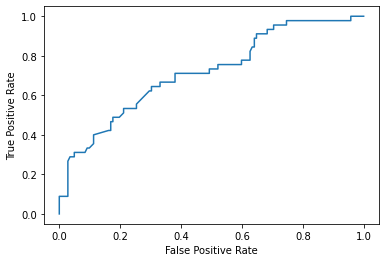

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, '2')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Create :class:`PrecisionRecallDisplay`
#############################################################################
 Similarly, the precision recall curve can be plotted using `y_score` from
 the prevision sections.



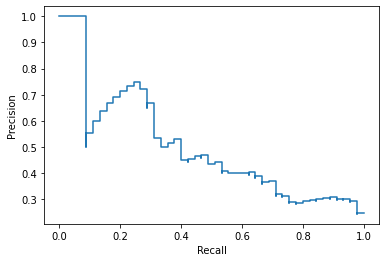

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


prec, recall, _ = precision_recall_curve(y_test, y_score, '2')
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

Combining the display objects into a single plot
#############################################################################
 The display objects store the computed values that were passed as arguments.
 This allows for the visualizations to be easliy combined using matplotlib's
 API. In the following example, we place the displays next to each other in a
 row.



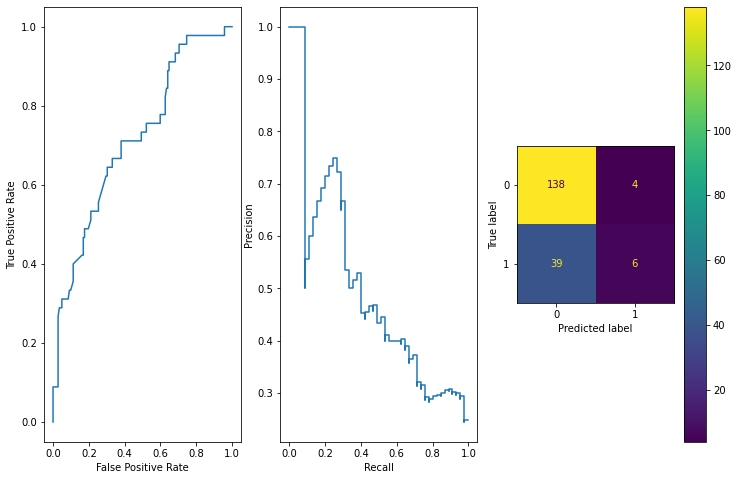

In [20]:
# sphinx_gallery_thumbnail_number = 4
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
cm_display.plot(ax=ax3)
plt.show()

In [80]:
import os
import vis_autselect.visualize as visualize
import importlib

# set import path
project_dir = os.path.abspath("..")

# reload package - development
importlib.reload(visualize)

# sample inputs 


input1 = [1, 0, 1 , 0, 1]
input2 = [True, False , True, False]
input3 = [1.123, 1.1233, 1.12323, 1.12323]

input4 = [input1, input2, input3]

print(visualize.select(input1))
print(visualize.select(input3))
print(visualize.select(input4))


[{'undefined': [1, 0, 1, 0, 1]}]
[{'confidence_scores': [1.123, 1.1233, 1.12323, 1.12323]}]
[{'undefined': [1, 0, 1, 0, 1]}, {'undefined': [True, False, True, False]}, {'confidence_scores': [1.123, 1.1233, 1.12323, 1.12323]}]


<module 'vis_autselect.visualize' from '/Users/Multitool/repos/vis-autoselect-ml/vis_autselect/visualize.py'>